In [1]:
from chinese_checkers.simulation.SimulationData import SimulationData
from chinese_checkers.simulation.SimulationMetadata import SimulationMetadata
from src.chinese_checkers.game.ChineseCheckersGame import ChineseCheckersGame
from src.chinese_checkers.geometry.Printer import Printer
from src.chinese_checkers.simulation.GameSimulation import GameSimulation
from src.chinese_checkers.model.BootstrapModel import BootstrapModel
from src.chinese_checkers.simulation.SimulationCatalog import SimulationCatalog
from src.chinese_checkers.reinforcement.dql.DqlModel import DqlModel
from src.chinese_checkers.reinforcement.cnn.DqlCnnModel import DqlCnnModel


from tqdm import tqdm

# import logging
# logging.basicConfig(level=logging.INFO)  

---

### Sample target positions

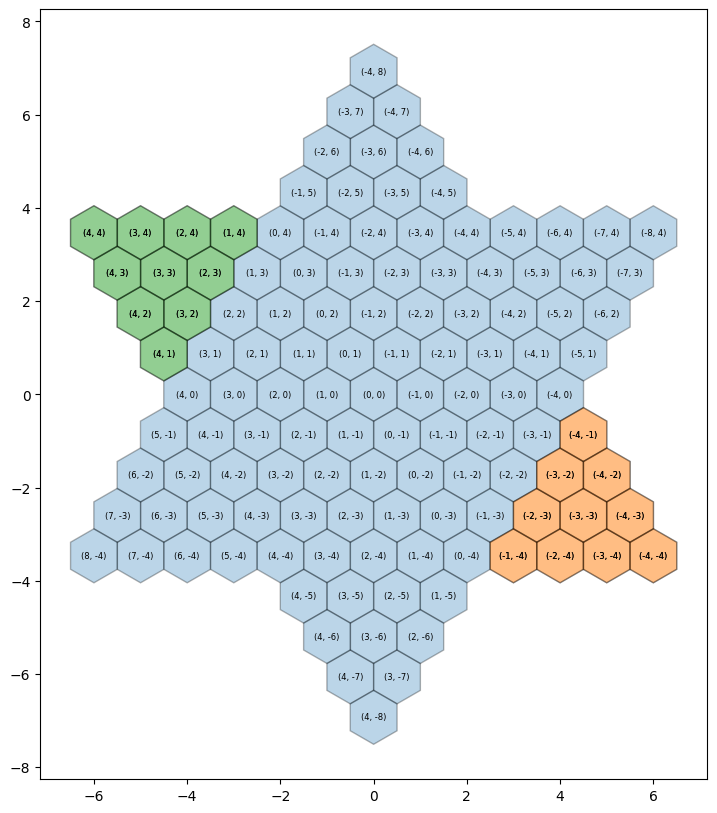

In [2]:
# set up the game
printer = Printer(plot_size=10, show_coordinates=True)
game = ChineseCheckersGame.start_game(2)

printer.print(
    game.board.hexagram_points,
    game.players[1].positions,
    game.players[1].target_positions
)

---
### Simulate a game between two centroid models

In [6]:
simulation_name = "dql-cnn-v003-vs-bootstrap-p0-simulation"
model_save_path = "../model/cnn/dql_cnn_model_v003.pth"
# model_1 = BootstrapModel(random_noise=0.5)
model_1 = DqlCnnModel(
    model_path=model_save_path,                          
    board_size=4                               
)
model_2 = BootstrapModel()
# model_2 = DqlModel(
#     q_network_path="../model/dlq_agent_model_v003.pth", 
#     state_dim=6,                                
#     action_dim=4,                              
#     board_size=4                               
# )
game_simulation = GameSimulation.simulate_game(
    models=[model_1, model_2],
    name=simulation_name,
    version="v0.0.1",
    print_period=200,
    show_coordinates=True
)
game_metadata: SimulationMetadata = game_simulation.metadata
game_data: SimulationData = game_simulation.data

Using device: cuda
Model loaded successfully from ../model/cnn/dql_cnn_model_v003.pth


C:\Users\dakot\Documents\Stanford\CS223\ChineseCheckersGameEngine\ChineseCheckersGameEngine\src\chinese_checkers\reinforcement\cnn\DqlCnnModel.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

In [4]:
print(game_metadata)

SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player=None, name='dql-cnn-v002-vs-bootstrap-p0-simulation', version='v0.0.1')


Creating Animation:   0%|          | 0/101 [00:00<?, ?it/s]


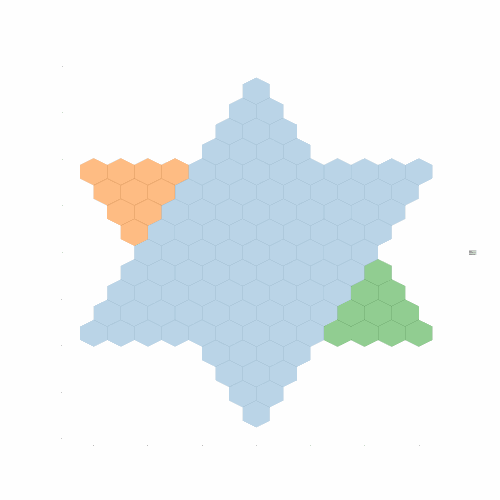

In [5]:
# display the game
game_simulation.display()

In [15]:
game_simulation.save_animation()

Creating Animation:   0%|          | 0/1001 [00:00<?, ?it/s]


---
### Generate a Training Data from the Bootstrap Model

In [7]:
catalog = SimulationCatalog()
# simulation_name = "bootstrap-p3-010-simulation"
simulation_name
# model_1 = DqlModel(
#     q_network_path="../model/dlq_agent_model_v003.pth", 
#     state_dim=6,                                
#     action_dim=4,                              
#     board_size=4                               
# )
model_1 = DqlCnnModel(
    model_path=model_save_path,                          
    board_size=4                               
)
# model_1 = BootstrapModel() 
model_2 = BootstrapModel() 

Using device: cuda
Model loaded successfully from ../model/cnn/dql_cnn_model_v003.pth


In [ ]:
successful_games = 0

progress_bar = tqdm(range(5000), desc="Simulating Games", unit="game")

for game_number in progress_bar:
    try:
        game_simulation = GameSimulation.simulate_game(
            models=[model_1, model_2],
            name=simulation_name,
            version="v0.0.1",
            max_turns=1000,
            # print_period=100,
            # show_coordinates=True
        )
        game_metadata: SimulationMetadata = game_simulation.metadata
        game_data: SimulationData = game_simulation.data

        winner_id = game_metadata.winning_player
        if winner_id is not None:
            successful_games += 1
        catalog.save_simulation(game_simulation)  

    except Exception as e:
        pass 

    progress_bar.set_postfix(completed=successful_games, total=game_number+1)

progress_bar.close()

Simulating Games:  16%|█▋        | 818/5000 [2:32:37<13:48:16, 11.88s/game, completed=0, total=818]